In [ ]:
import numpy as np
from matplotlib import pyplot as plt # only need pyplot from matplotlib

In [7]:
# 1.1 (numerical differentiation of sin(x) at x_0 = pi/4)
f = lambda x: np.sin(x)
x0 = (np.pi)/4
dxs = np.array([10**-k for k in range(8)]) # dx = 1, 0.1, 0.01, ..., 10^-7
dys = np.array([f(x0 + dx) - f(x0) for dx in dxs]) # difference quotients f(x0 + dx) - f(x0)
df_x0_approx = dys/dxs 

print(df_x0_approx)

[0.26995448 0.67060297 0.70355949 0.70675311 0.70707142 0.70710325
 0.70710643 0.70710675]


[4.37152298e-01 3.65038083e-02 3.54728950e-03 3.53671212e-04
 3.53565172e-05 3.53554139e-06 3.53553384e-07 3.58075539e-08]


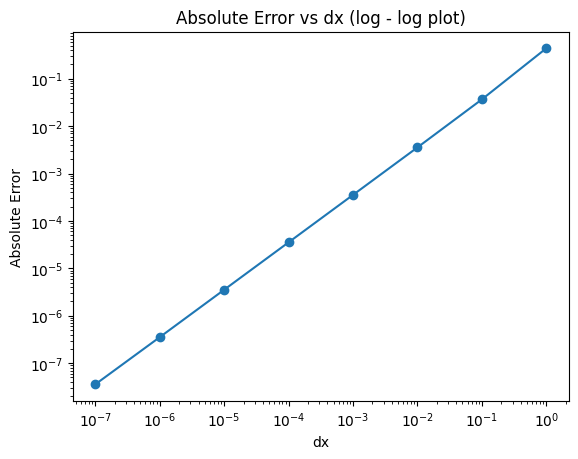

In [12]:
#1.2 (plot of absolute errors)
df_x0 = np.cos(np.pi/4)
abserr = np.array(np.abs(df_x0_approx - df_x0))
plt.plot(dxs, abserr, '-o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("dx")
plt.ylabel("Absolute Error")
plt.title("Absolute Error vs dx (log - log plot)")

print(abserr)

In [14]:
#1.3 (absolute error as a linear function of step dx)
c1 = np.polyfit(np.log(dxs), np.log(abserr), 1) # linear fit to log-log data
print(f"The absolute error is approximately a linear function of the step dx with slope = {c1[0]}") # slope should be close to 1 -> absolute error ~ dx

The absolute error is approximately a linear function of the step dx with slope = 1.0081008930941338


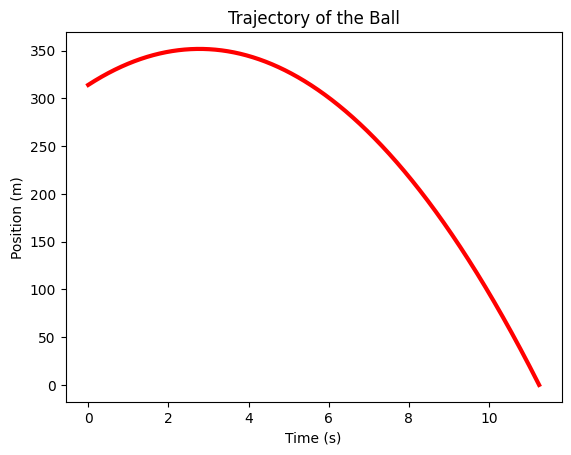

The ball reaches the ground at time ~ 11.247999999999205 s


In [19]:
#2 (simulation of a falling ball using forward Euler method)

class particle():

    def __init__(self, t, m, y, v): 
        self.t = t
        self.m = m
        self.y = y
        self.v = v

    def forward_euler(self, f, dt): 
        a = f/self.m # f is passed in as a constant; if f depends on m, t, y, v we would need to evaluate the force at each step and then pass the scalar value to forward_euler
        self.t = self.t + dt
        self.y = self.y + self.v * dt
        self.v = self.v + a * dt

g = 9.8
m = 1
t_0 = 0.0
y_0 = 314.15
v_0 = 27.18
f = - m*g # constant force due to gravity
dt = 0.001

ball = particle(t_0, m, y_0, v_0)

ys = [y_0]
ts = [t_0]
while ball.y > 0:
    ball.forward_euler(f, dt)
    ys.append(ball.y)
    ts.append(ball.t)
              
plt.plot(ts,ys,color="#FF0000", ls='-', lw=3)
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.title("Trajectory of the Ball")
plt.show()

print(f"The ball reaches the ground at time ~ {ts[-1]} s")